Optical Interconnection networks

importing libraries

In [27]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

loading the dataset

In [29]:
# Load the dataset
df = pd.read_csv('/content/optical_interconnection_network.csv')

Basic information about the dataset

In [30]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Node Number             640 non-null    int64  
 1   Thread Number           640 non-null    int64  
 2   Spatial Distribution    640 non-null    object 
 3   Temporal Distribution   640 non-null    object 
 4   T/R                     640 non-null    object 
 5   Processor Utilization   640 non-null    object 
 6   Channel Waiting Time    640 non-null    object 
 7   Input Waiting Time      640 non-null    object 
 8   Network Response Time   640 non-null    object 
 9   Channel Utilization     640 non-null    object 
 10  Unnamed: 10             0 non-null      float64
 11  Unnamed: 11             0 non-null      float64
 12  Unnamed: 12             0 non-null      float64
 13  Unnamed: 13             0 non-null      float64
 14  Unnamed: 14             0 no

Size of the dataset

In [31]:
df.shape

(640, 15)

In [32]:
df.head()

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,64,4,UN,Client-Server,"0,1","0,839546","1,974686","308,491814","700,514102","0,352431",NaN,NaN,NaN,NaN,NaN
1,64,4,UN,Client-Server,"0,2","0,827412","9,556437","291,037663","864,599227","0,506302",NaN,NaN,NaN,NaN,NaN
2,64,4,UN,Client-Server,"0,3","0,802605","27,027618","264,928002","839,372851","0,638516",NaN,NaN,NaN,NaN,NaN
3,64,4,UN,Client-Server,"0,4","0,723403","61,848511","235,776888","1256,053108","0,767051",NaN,NaN,NaN,NaN,NaN
4,64,4,UN,Client-Server,"0,5","0,72121","121,085884","189,680044","1343,875577","0,807812",NaN,NaN,NaN,NaN,NaN


changing into the dataframes

In [33]:
df=pd.DataFrame(df)

checking the null values

In [34]:
df.isnull().sum().sum()

3200

missing values and categorical columns

In [35]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)


Missing Values:
Node Number                 0
Thread Number               0
Spatial Distribution        0
Temporal Distribution       0
T/R                         0
Processor Utilization       0
Channel Waiting Time        0
Input Waiting Time          0
Network Response Time       0
Channel Utilization         0
Unnamed: 10               640
Unnamed: 11               640
Unnamed: 12               640
Unnamed: 13               640
Unnamed: 14               640
dtype: int64

Categorical Columns: Index(['Spatial Distribution', 'Temporal Distribution', 'T/R',
       'Processor Utilization ', 'Channel Waiting Time', 'Input Waiting Time',
       'Network Response Time', 'Channel Utilization'],
      dtype='object')


Label encoding

In [36]:
# Perform Label Encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [37]:
df.head()

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,64,4,3,1,0,472,28,283,553,33,NaN,NaN,NaN,NaN,NaN
1,64,4,3,1,1,464,605,268,600,97,NaN,NaN,NaN,NaN,NaN
2,64,4,3,1,2,450,259,239,590,212,NaN,NaN,NaN,NaN,NaN
3,64,4,3,1,3,393,478,212,67,311,NaN,NaN,NaN,NaN,NaN
4,64,4,3,1,4,391,126,152,91,353,NaN,NaN,NaN,NaN,NaN


Droping the unwanted columns

In [40]:
columns_to_drop = ['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12','Unnamed: 13','Unnamed: 14']
df.drop(columns=columns_to_drop, inplace=True)

Simple imputer

In [41]:
# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [42]:
df_imputed.head()

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
0,64.0,4.0,3.0,1.0,0.0,472.0,28.0,283.0,553.0,33.0
1,64.0,4.0,3.0,1.0,1.0,464.0,605.0,268.0,600.0,97.0
2,64.0,4.0,3.0,1.0,2.0,450.0,259.0,239.0,590.0,212.0
3,64.0,4.0,3.0,1.0,3.0,393.0,478.0,212.0,67.0,311.0
4,64.0,4.0,3.0,1.0,4.0,391.0,126.0,152.0,91.0,353.0


Pairplot

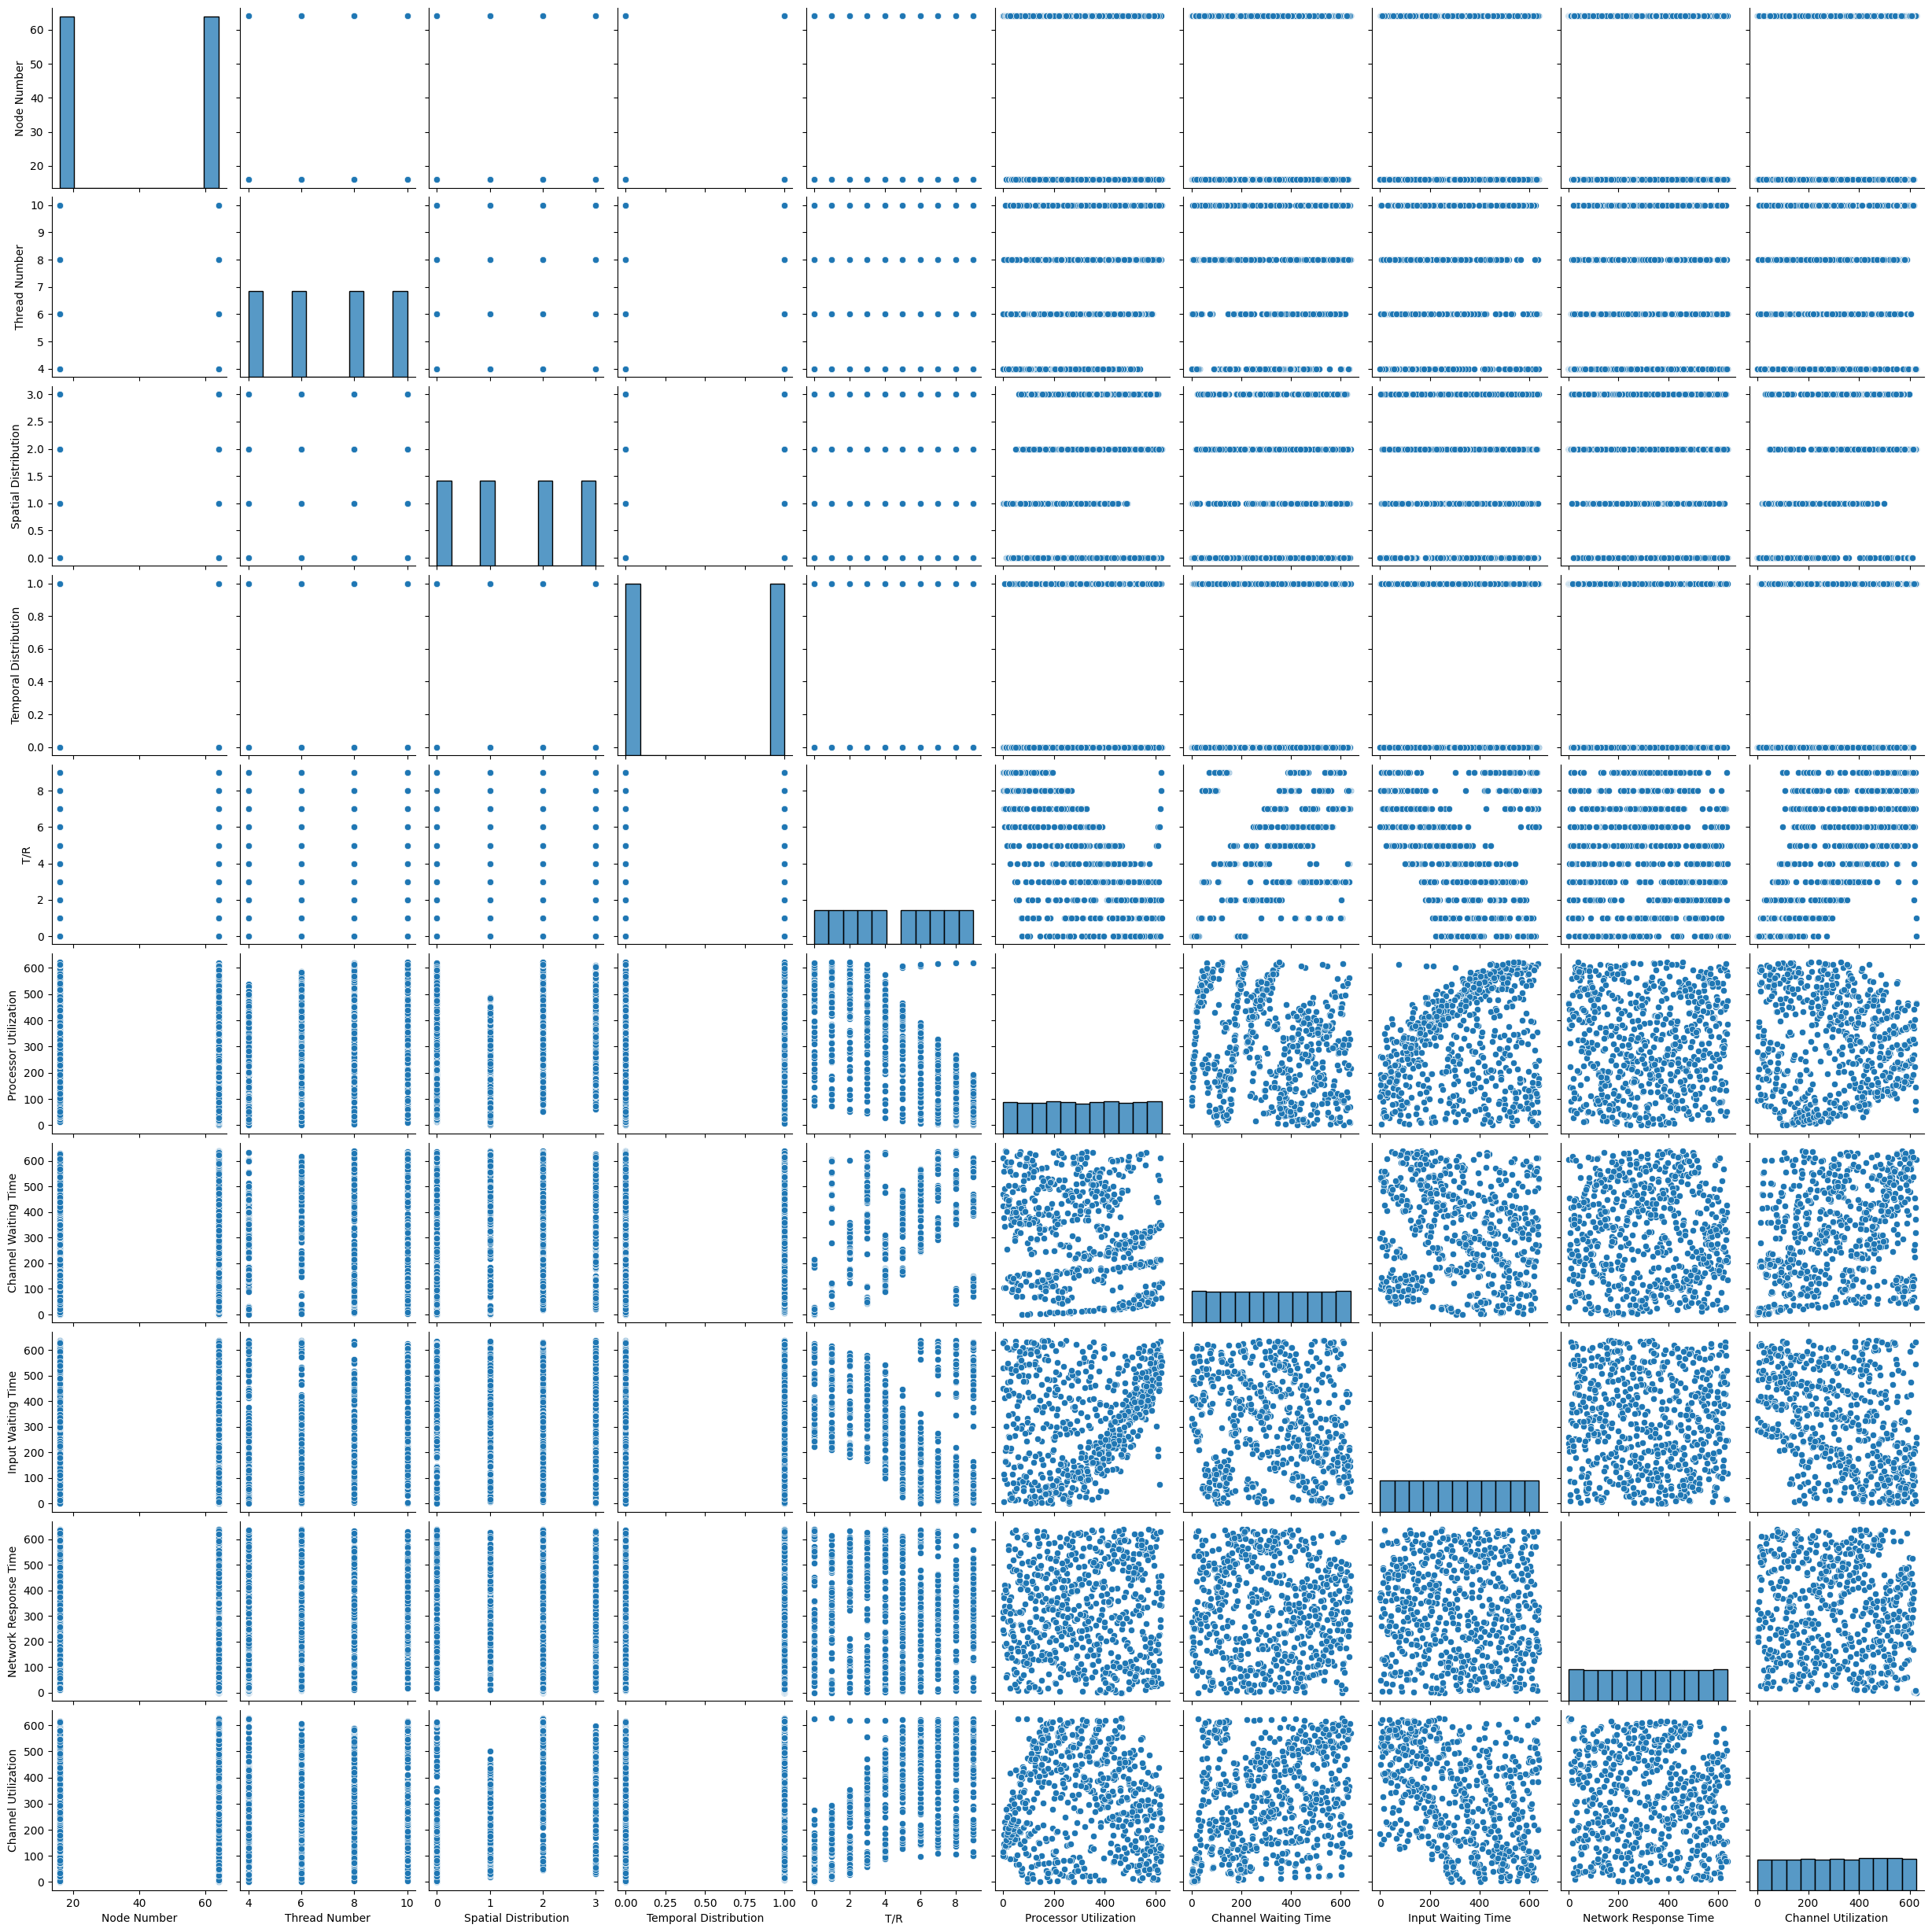

In [140]:
sns.pairplot(df_imputed)
plt.show()

Heat map

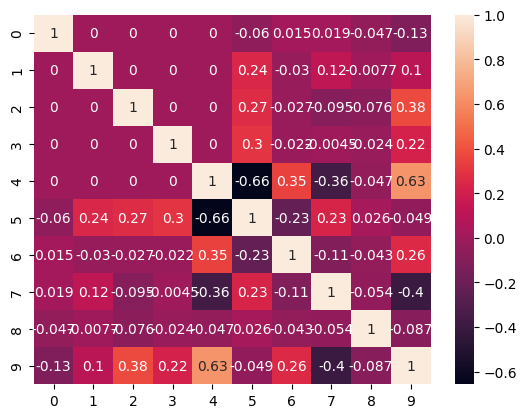

In [141]:
corr=np.corrcoef(df_imputed.values.T) # T - transpose
hm=sns.heatmap(corr, annot=True)
plt.show()

data partition in to data and target variable

In [92]:
# Split dataset into features and target variable
X = df_imputed.drop('Temporal Distribution', axis=1)
y = df_imputed['Temporal Distribution']

Standaridising the data using StandardScaler

In [93]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Spliting the data for training and testing in 80 20 ratio

In [94]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [95]:
column_names = df_imputed.columns
print(column_names)

Index(['Node Number', 'Thread Number', 'Spatial Distribution',
       'Temporal Distribution', 'T/R', 'Processor Utilization ',
       'Channel Waiting Time', 'Input Waiting Time', 'Network Response Time',
       'Channel Utilization'],
      dtype='object')


In [96]:
column_names_list = list(column_names)
print(column_names_list)

['Node Number', 'Thread Number', 'Spatial Distribution', 'Temporal Distribution', 'T/R', 'Processor Utilization ', 'Channel Waiting Time', 'Input Waiting Time', 'Network Response Time', 'Channel Utilization']


Logistic Regression

In [97]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
train_x_sc_lr=lr.predict(X_train)
y_predict=lr.predict(X_test)

model evaluating

In [98]:
#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:%.2f"%accuracy_score(y_test,y_predict))
print("training Accuracy: ", lr.score(X_train,y_train))
print("testing Accuracy: ", lr.score(X_test,y_test))

Accuracy:0.63
training Accuracy:  0.705078125
testing Accuracy:  0.6328125


hyperparameter tuning using kfold and gridsearch cv

In [99]:
# Define models
models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier())
]

In [100]:
# Define parameters for hyperparameter tuning
params = [
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
]

hyperparameter tuning for models Random forest,SVM,KNN

In [101]:
# Perform KFold cross-validation and hyperparameter tuning for each model
results = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid=params[models.index((name, model))], cv=kfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    results.append((name, accuracy, f1, cm))

Model evaluating

In [102]:
# Print results
for name, accuracy, f1, cm in results:
    print("Model:", name)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(cm)
    print("\n")

Model: Random Forest
Accuracy: 0.90625
F1 Score: 0.9060661764705882
Confusion Matrix:
[[62  4]
 [ 8 54]]


Model: SVM
Accuracy: 0.9453125
F1 Score: 0.9452957851946941
Confusion Matrix:
[[63  3]
 [ 4 58]]


Model: KNN
Accuracy: 0.8359375
F1 Score: 0.8359675572519084
Confusion Matrix:
[[55 11]
 [10 52]]




Ploting the  bar graph for comparing the accuracy scores

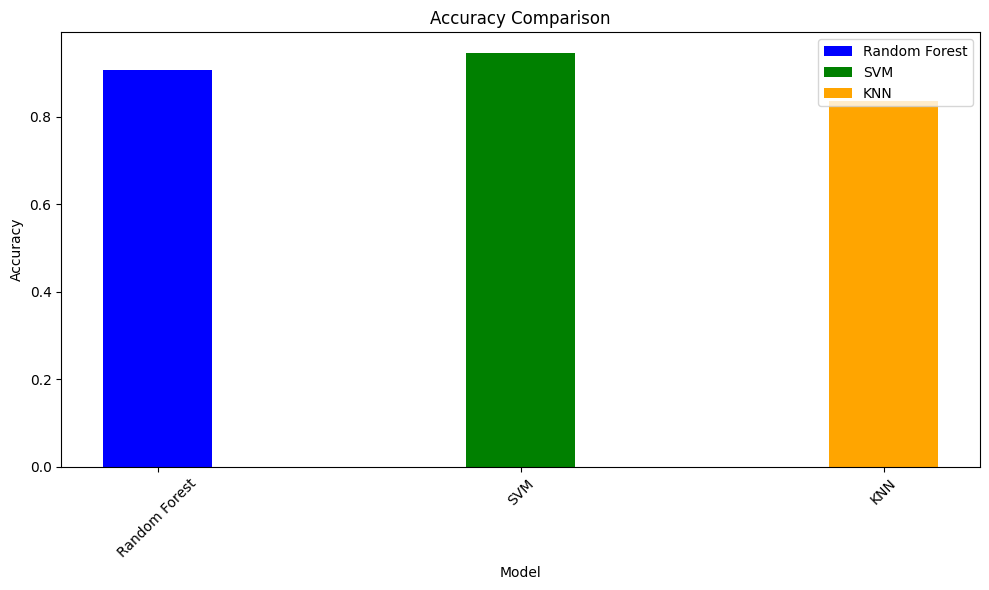

In [147]:
# Plot accuracies with different colors and smaller bars
plt.figure(figsize=(10, 6))
names = [name for name, _, _, _ in results]
accuracies = [accuracy for _, accuracy, _, _ in results]
colors = ['blue', 'green', 'orange']  # Define colors for bars
bar_width = 0.3  # Define the width of the bars

for i, (name, accuracy) in enumerate(zip(names, accuracies)):
    plt.bar(i, accuracy, color=colors[i], width=bar_width, label=name)

plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(range(len(names)), names, rotation=45)  # Set x-axis labels with rotation
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout
plt.show()

Ploting the bar graph for comparing the f1 scores

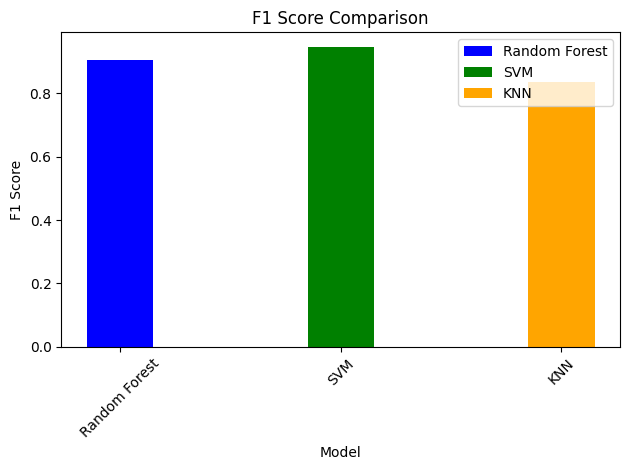

In [126]:
# Plot accuracies with different colors and smaller bars
f1_scores = [f1 for _, _, f1, _ in results]
colors = ['blue', 'green', 'orange']  # Define colors for bars
bar_width = 0.3  # Define the width of the bars

for i, (name, f1) in enumerate(zip(names, f1_scores)):
    plt.bar(i, f1, color=colors[i], width=bar_width, label=name)

plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(range(len(names)), names, rotation=45)  # Set x-axis labels with rotation
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout
plt.show()

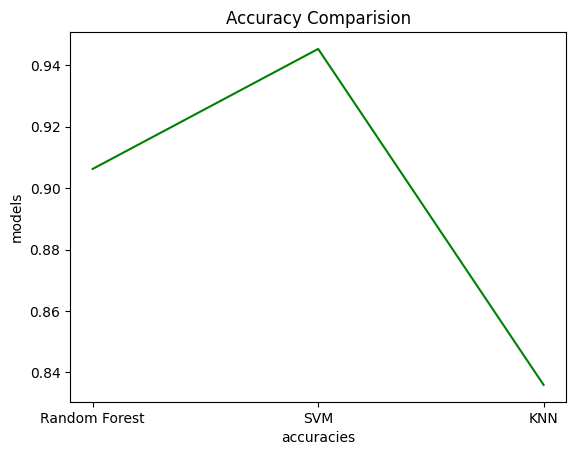

In [132]:
y=accuracies
x=names
plt.xlabel("accuracies")
plt.ylabel("models")
plt.title("Accuracy Comparision")
plt.plot(x,y,color="green")

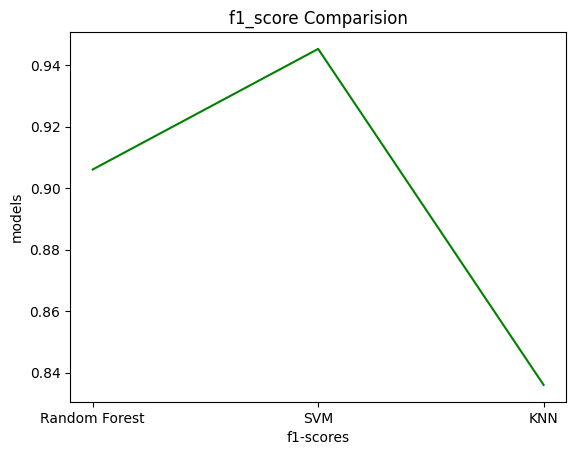

In [133]:
y=f1_scores
x=names
plt.xlabel("f1-scores")
plt.ylabel("models")
plt.title("f1_score Comparision")
plt.plot(x,y,color="green")